## importing libraries

In [48]:
import numpy as np
import pandas as pd
import re #regular expressions (regex)
import string #will be used to define regex function
import nltk #natural language toolkit
from nltk.corpus import stopwords
import opendatasets as od
from sklearn.feature_extraction.text import TfidfVectorizer #Term frequency and Inverse Document frequency (more common words, less importance)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

nltk.download('stopwords')

od.download("https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset")#kaggle dataset


Skipping, found downloaded files in ".\sms-spam-collection-dataset" (use force=True to force download)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mihir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## reading the dataset
After reading the dataset, we are also selecting the necessary columns: column v1 contains the label (ham or spam) and v2 contains the actual message. After that, we are renaming the columns v1 and v2 to 'label' and 'message' for clarity.

In [50]:
df = pd.read_csv("sms-spam-collection-dataset/spam.csv", encoding='latin-1')#utf-8 can't handle all the characters
df = df[['v1', 'v2']]#taking only what is necessary
df.columns = ['label', 'message']#renaming the columns as label (ham or spam) and message

## convert labels to binary format


In [52]:
df['label']=df['label'].map({'ham':0,'spam':1})#ham is not spam(0) and spam is denoted by binary variable 1

## to preprocess the input- handling punctuation, tokenization, removing stopwords
This function preprocesses text data by:
- Converting text to lowercase for uniformity.
- Removing punctuation using re.sub().
- Tokenizing the text by splitting it into words.
- Filtering out stopwords (common words like "the", "is") using NLTK's stopwords.words('english').
- Returning the cleaned text as a space-separated string.

The processed text is then stored in a new column 'preprocessed', where the preprocessing function is applied to each message

In [54]:
def preprocessing(input):
    input=input.lower()#lowercase to maintain uniformity
    input=re.sub(f"[{string.punctuation}]","",input)#in the input, substitute all instances of punctuation by ""
    words=input.split()#performing tokenization
    filtered_words=[]
    for word in words:
        if word not in stopwords.words('english'):#all those words that are not stopwords are selected
            filtered_words.append(word)
    words=filtered_words
    return " ".join(words)

df['preprocessed']=df['message'].apply(preprocessing)#creating a new columnn for the preprocessed message

In [55]:
df[['message','preprocessed']].head()

,message,preprocessed
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


## converting the preprocessed message to numerical features
This code converts preprocessed text into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency). TfidfVectorizer() assigns weights to words based on their importance. fit_transform() transforms the text into a sparse matrix.

In [73]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessed'])
y = df['label']

print(X.toarray()[:5])#prints numerical representation of texts
print(y.head())#prints the labels

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


## training and testing the logistic regression model

In [59]:
#splitting dataset to training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

#model training
model = LogisticRegression()
model.fit(X_train, y_train)

#obtaining predictions
y_pred = model.predict(X_test)

## visualising the confusion matrix

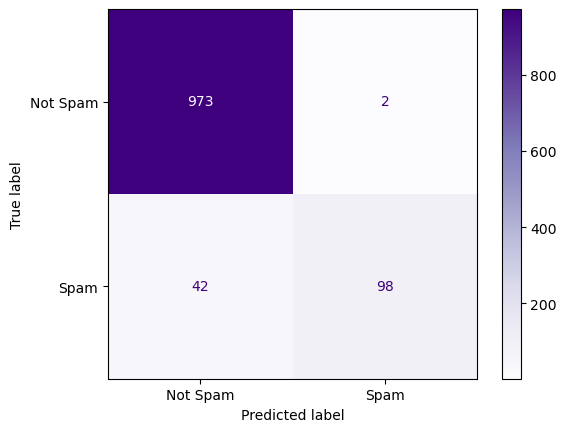

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot(cmap='Purples')

## the performance measures
- TN: True Negatives (Predicted not spam and it is actually not spam)
- TP: True Positives (Predicted spam and it is actually spam)
- FP: False Positives (Predicted spam and it is actually not spam)
- FN: False Negatives (Predicted not spam and it is actually spam)

Here, we can verify the performance measures that are generated by looking at the confusion matrix. 
- The formula for accuracy is (TP+TN) / (TP+TN+FP+FN) and we can verify the value that is being printed by calculating the accuracy from the confusion matrix. It will be calculated as (98+973)/(98+973+2+42)=(1071)/(1115) = 0.961
- Similarly, the formula for precision (P) is (TP) / (TP+FP)
- The formula for recall (R) is given by (TP) / (TP+FN)
- The F1 score is calculated as (2*P*R) / (P+R)

Using these formulae, we can easily verify the value for each performance measure

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.961
Precision: 0.980
Recall: 0.700
F1 Score: 0.817
